In [1]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as sm

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<AxesSubplot:xlabel='price', ylabel='Count'>

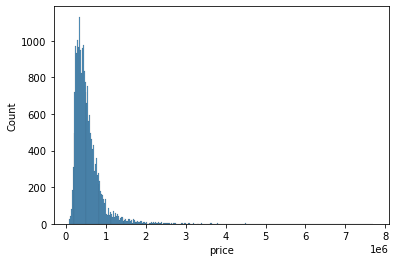

In [4]:
sns.histplot(df["price"], kde = False)

<AxesSubplot:xlabel='price', ylabel='Density'>

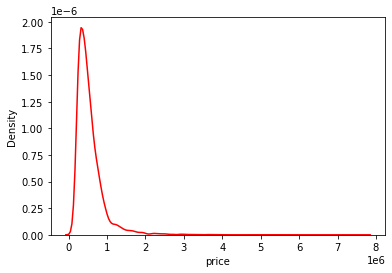

In [7]:
sns.kdeplot(df['price'], shade = False, color = "red")

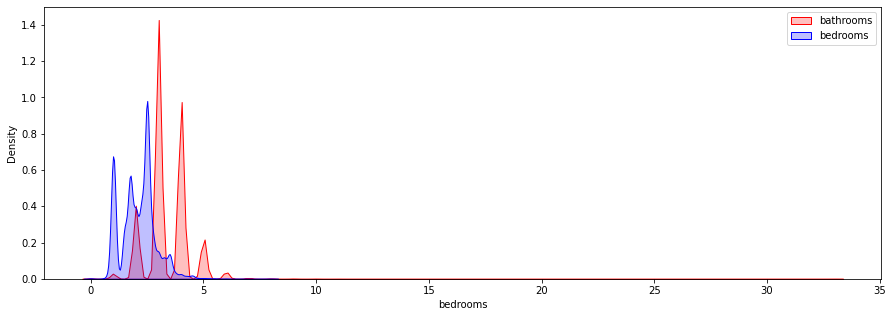

In [9]:
plt.figure(figsize=(15,5)) 

sns.kdeplot(df['bedrooms'], shade = True, color = "red", label = "bathrooms")
sns.kdeplot(df['bathrooms'], shade = True, color = "blue", label = "bedrooms")

plt.legend() 
plt.show()

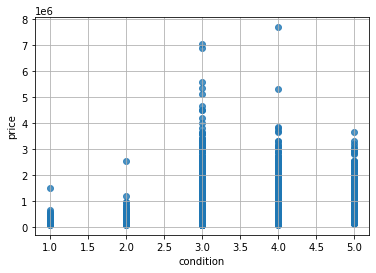

In [14]:
sns.regplot(x = df["condition"], y = df["price"], fit_reg = False)

plt.grid()

<AxesSubplot:>

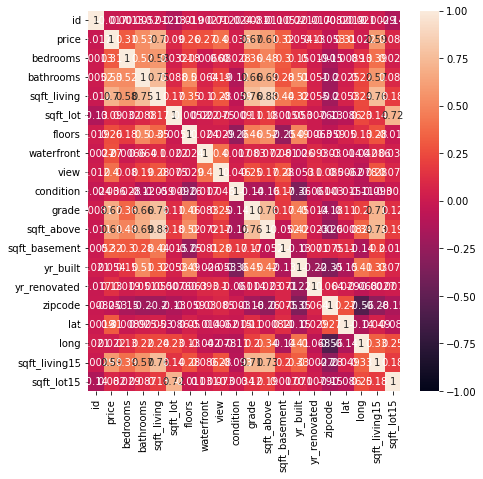

In [15]:
plt.figure(figsize=(7,7))


corr = df.corr()


sns.heatmap(corr, vmin = -1, annot = True)

date
20140502T000000    5.262515e+05
20140503T000000    4.669700e+05
20140504T000000    5.766900e+05
20140505T000000    5.809386e+05
20140506T000000    5.340479e+05
                       ...     
20150513T000000    5.116239e+05
20150514T000000    6.034363e+05
20150515T000000    4.500000e+05
20150524T000000    4.455000e+05
20150527T000000    1.310000e+06
Name: price, Length: 372, dtype: float64


<AxesSubplot:xlabel='date', ylabel='price'>

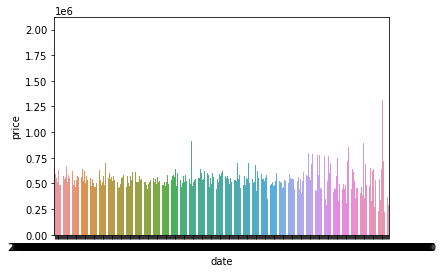

In [18]:
print(df["price"].groupby(df["date"]).mean())

###

sns.barplot(data = df, x = "date", y = "price", ci = None)

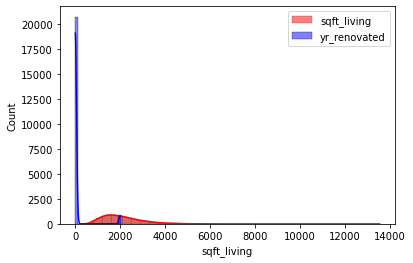

In [20]:
sns.histplot(df['sqft_living'], color = "red", label = "sqft_living", kde=True) 
sns.histplot(df['yr_renovated'], color ="blue", label = "yr_renovated", kde=True) 

plt.legend()
plt.show()

sqft_above
290        0.0
370        0.0
380        0.0
384        0.0
390        0.0
         ...  
7880       0.0
8020       0.0
8570    3480.0
8860    1030.0
9410    4130.0
Name: sqft_basement, Length: 946, dtype: float64


<AxesSubplot:xlabel='sqft_above', ylabel='sqft_basement'>

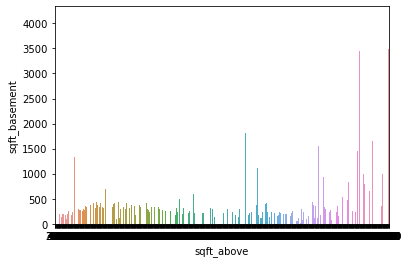

In [21]:
print(df["sqft_basement"].groupby(df["sqft_above"]).mean())

###

sns.barplot(data = df, x = "sqft_above", y = "sqft_basement", ci = None)

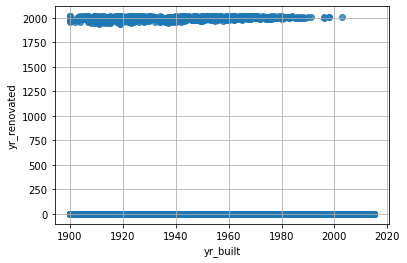

In [22]:
sns.regplot(x = df["yr_built"], y = df["yr_renovated"], fit_reg = False)

plt.grid()

In [ ]:
df["Student"].replace("Mary", "Mary-Ann", inplace = True)

sqft_lot15
651       1070.0
659       1210.0
660       1220.0
748       1150.0
750       1240.0
           ...  
434728    1830.0
438213    2700.0
560617    1500.0
858132    1280.0
871200    3420.0
Name: sqft_living15, Length: 8689, dtype: float64


<AxesSubplot:xlabel='sqft_lot15', ylabel='sqft_living15'>

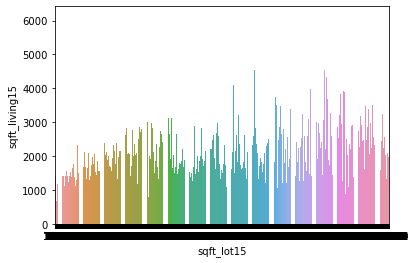

In [24]:
print(df["sqft_living15"].groupby(df["sqft_lot15"]).mean())

###

sns.barplot(data = df, x = "sqft_lot15", y = "sqft_living15", ci = None)

In [ ]:
print(df[""].groupby(df[""]).mean())

###

sns.barplot(data = df, x = "", y = "", ci = None)

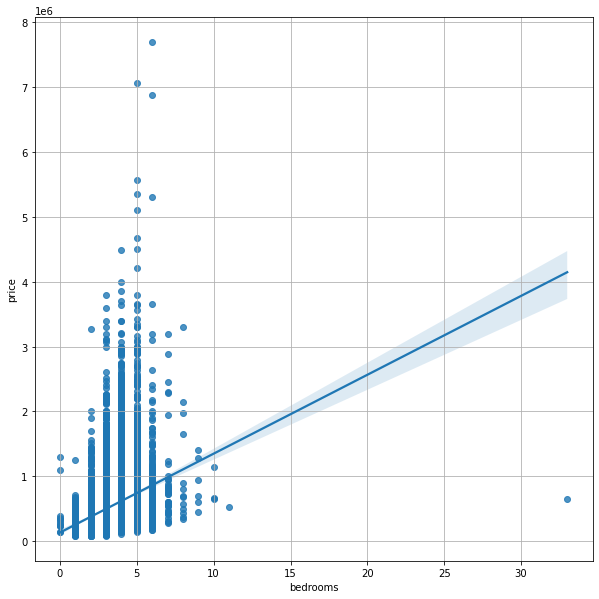

In [25]:
plt.figure(figsize=(10,10))

sns.regplot(x = df["bedrooms"], y = df["price"], fit_reg = True)

plt.grid()

In [ ]:
df_odds[""] = (df_odds[""] - 1) * 100

df_odds